###### Importing the necessery librairies 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns 
%matplotlib inline

###### Load the dataset

In [5]:
df=pd.read_csv("C:\\Users\\Owner\\Documents\\kidney_disease.csv")
data=df
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# shape 
data.shape

(400, 26)

###### Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
# data describe
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
# null values 
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
# correlation 
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [13]:
# Value counts class 
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

<AxesSubplot:title={'center':'Count of Diagnose of Kidney'}>

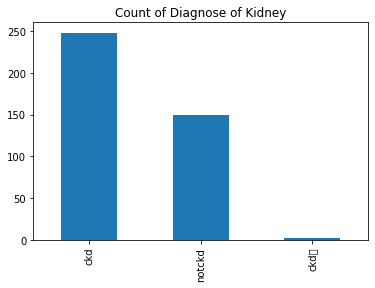

In [16]:
#Understanding the balancing of the data visually
import warnings
warnings.filterwarnings('ignore')
df['classification'].value_counts().plot(kind='bar' , 
                                        title='Count of Diagnose of Kidney')

<AxesSubplot:ylabel='Frequency'>

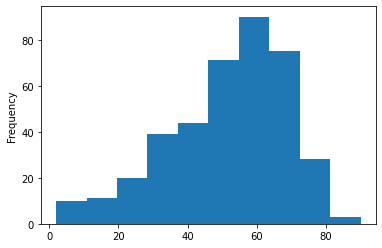

In [17]:
# Distribution of Age
df['age'].plot(kind='hist')

<AxesSubplot:>

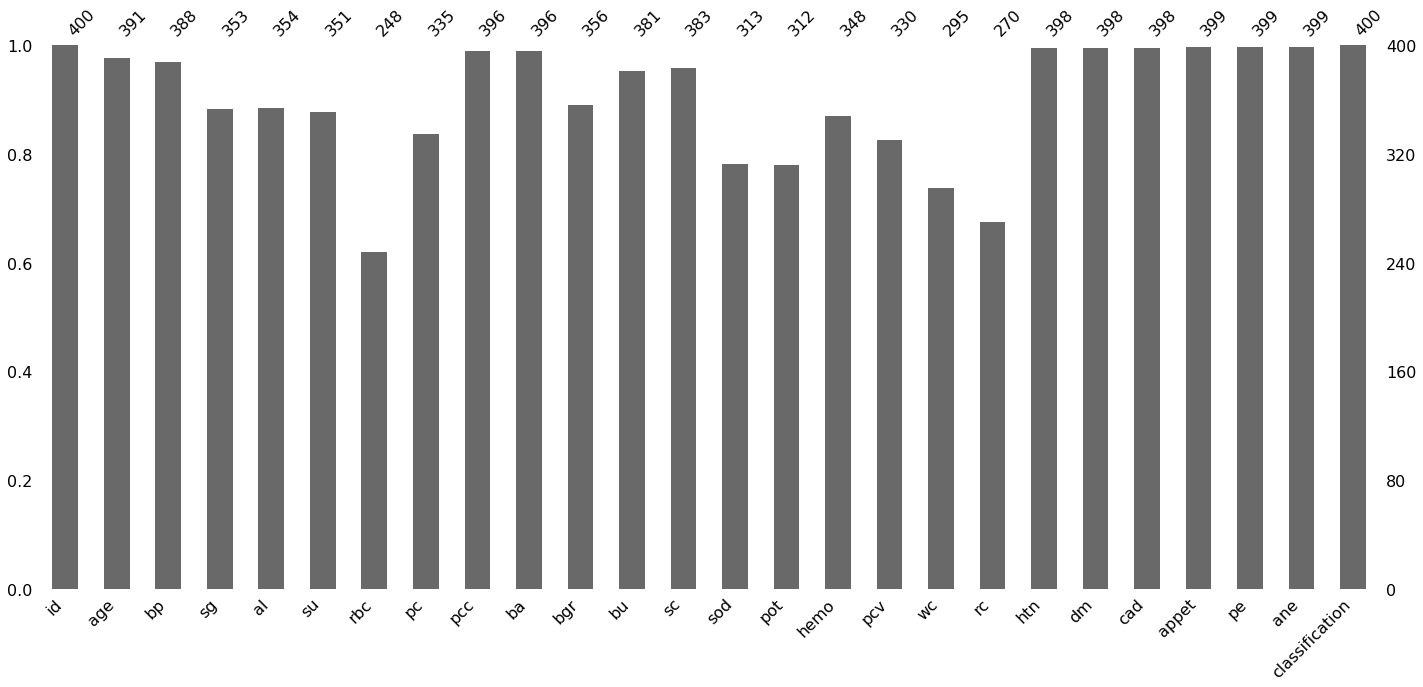

In [18]:
import missingno as msno
msno.bar(df)

Inference: Here any features which have not touched the 400 mark at the top are having null values.

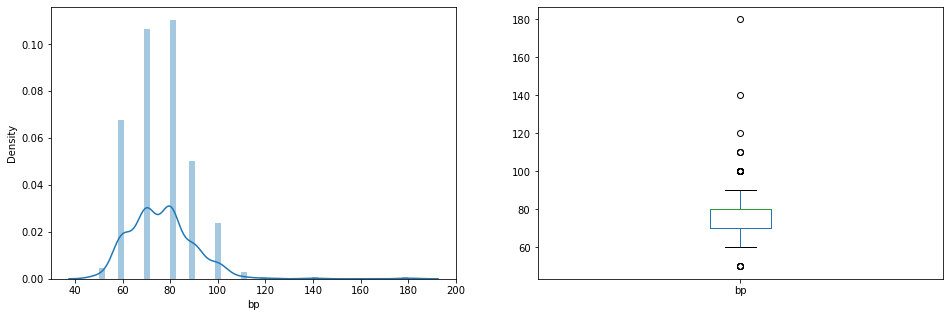

In [21]:
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

Inference: Here in the above graph we can see the distribution of blood pressure and also in the subplot it is visible that the bp column has some outliers in it.

In [22]:
# Now we will convert the categorical values (object) to categorical values(int)
data['classification']=data['classification'].map({'ckd':1, 'notckd':0, 'ckd\t':1})

In [23]:
data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [24]:
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})
data['classification'].value_counts()

1    250
0    150
Name: classification, dtype: int64

In [25]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


<AxesSubplot:>

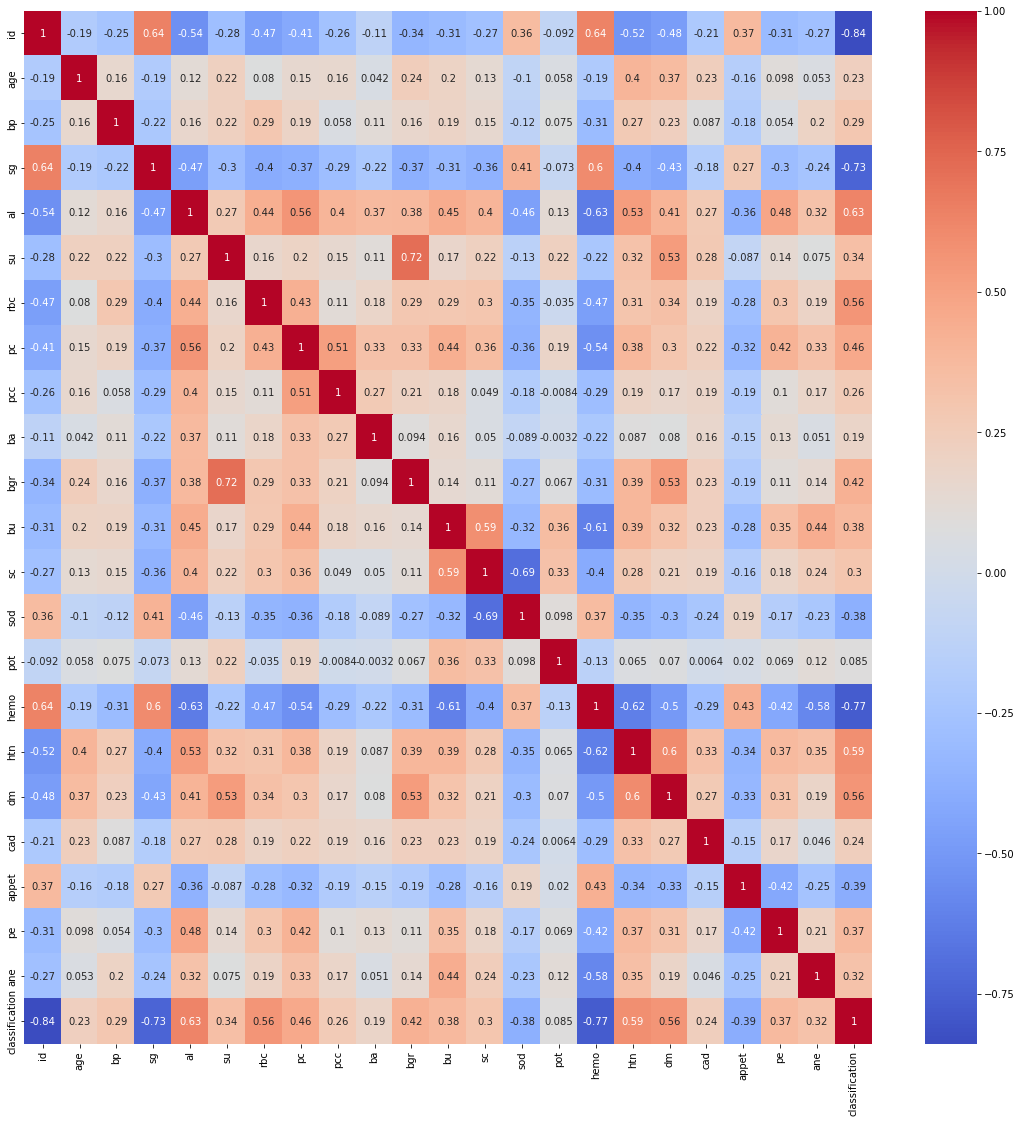

In [26]:
# finding the correlation between the plots
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

###### Exploratory data analysis (EDA)

In [27]:
# Let's see the shape of the dataset again after analysis
data.shape

(400, 26)

In [29]:
del data['id']

In [30]:
data.shape

(400, 25)

In [31]:
# columns 
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [32]:
# Now dropping the null values 
data.shape[0]

400

In [33]:
data.dropna().shape[0]

158

Here from the above output, we can see that there are 158 null values in the dataset. Now here we are left with two choices that we could either drop all the null values or keep them when we will drop that NA values so we should understand that our dataset is not that large and if we drop those null values then it would be even smaller in that case if we provide very fewer data to our machine learning model then the performance would be very less also we yet don’t know that these null values are related to some other features in the dataset.

So for this time I’ll keep these values and see how the model will perform in this dataset.

Also when we are working on some healthcare project where we will be predicting whether the person is suffering from that disease or not then one thing we should keep in my mind is that the model evaluation should have the least false positive errors.

In [34]:
data.dropna(inplace=True)
data.shape

(158, 25)

###### Model Building

###### 1. Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
X=data.iloc[:,:-1]
y=data['classification']

X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y,
                                                 shuffle=True )
logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Training Score
logreg.score(X_train, y_train)

1.0

In [37]:
# Test Score 
logreg.score(X_test, y_test)

1.0

In [48]:
train_pred=logreg.predict(X_train)
test_pred=logreg.predict(X_test)

In [49]:
# Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [50]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.227735,-0.121687,0.004341,0.423864,0.021701,0.020776,0.129308,0.004023,0.018524,0.214452,...,-0.305634,-0.858901,0.000753,-0.138036,0.119982,0.120304,-0.000457,-0.004879,0.01223,0.005934


###### Confusion Matrix

In [51]:
def plot_conf_mat(y_test,y_preds):
    """
    This function will be heloing in plotting the confusion matrix by using seaborn
    """
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

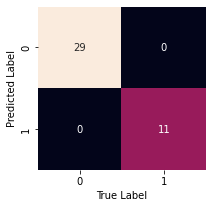

In [52]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [53]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


###### K-Nearest Neighboard Classifier

It is a good practice to first balance the class well before using the KNN, as we know that in the case of unbalanced classes KNN doesn’t perform well.

In [55]:
df['classification'].value_counts()

0    115
1     43
Name: classification, dtype: int64

In [57]:
# Now let's Concatenate our class variable togheter
balanced_df = pd.concat([df[df["classification"] == 0], df[df["classification"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)
balanced_df["classification"].value_counts()

1    115
0    115
Name: classification, dtype: int64

In [58]:
# Now we will scale down the data 
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [59]:
# Now we will tune the KNN model for better accuracy
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
model = gs.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.925

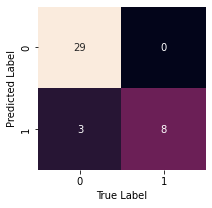

In [61]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 3
True Pos: 8


##### Feature Importance 

In [63]:
feature_dict=dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict

{'age': 0.22773465017552194,
 'bp': -0.1216872262521167,
 'sg': 0.004340989323057716,
 'al': 0.42386360282239594,
 'su': 0.02170057833001515,
 'rbc': 0.02077577551364751,
 'pc': 0.12930800390746572,
 'pcc': 0.004022509309264727,
 'ba': 0.01852447246039192,
 'bgr': 0.2144524411390533,
 'bu': 0.29154829281207173,
 'sc': 0.1762141167410414,
 'sod': -0.09627816418485564,
 'pot': 0.04878658592657224,
 'hemo': -0.30563436503633135,
 'pcv': -0.8589007634492951,
 'wc': 0.0007526334736603996,
 'rc': -0.13803618844958723,
 'htn': 0.11998178162645606,
 'dm': 0.12030371610702613,
 'cad': -0.000456997726002833,
 'appet': -0.0048789658127397426,
 'pe': 0.012229977013765776,
 'ane': 0.005934128312577211}

###### Visualize feature importance 

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Frequency'>

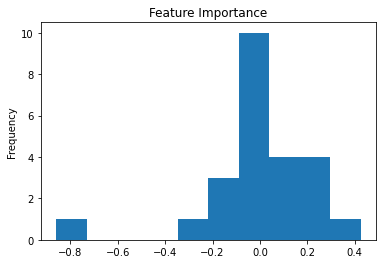

In [66]:
# feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

##### Visualize feature importance - Transpose

<AxesSubplot:title={'center':'Feature Importance'}>

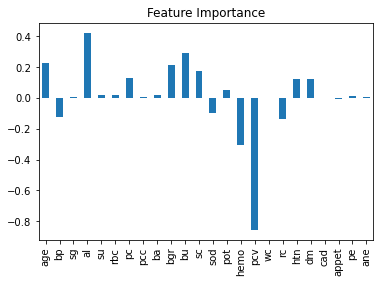

In [65]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

###### Saving Model

In [67]:
import pickle

# Now with the help of pickle model we will be saving the trained model
saved_model = pickle.dumps(logreg)

# Load the pickled model
logreg_from_pickle = pickle.loads(saved_model)

# Now here we will load the model
logreg_from_pickle.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)